<a href="https://colab.research.google.com/github/batuhancepni/Deeplearning-trainings/blob/main/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [6]:
from keras import models
from keras import layers

In [7]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [8]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [9]:
num_val_samples

101

In [10]:
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [14]:
all_scores

[2.1692991256713867, 2.6142024993896484, 2.8067355155944824, 2.670353889465332]

In [15]:
np.mean(all_scores)

2.5651477575302124

In [17]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [18]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=1)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
Epoch 1/500
303/303 [==============================] - 1s 2ms/step - loss: 181.0053 - mae: 10.2152 - val_loss: 38.7544 - val_mae: 4.0074
Epoch 2/500
303/303 [==============================] - 1s 2ms/step - loss: 29.2989 - mae: 3.7822 - val_loss: 26.4863 - val_mae: 3.0965
Epoch 3/500
303/303 [==============================] - 0s 2ms/step - loss: 22.2974 - mae: 3.1910 - val_loss: 20.9989 - val_mae: 2.8518
Epoch 4/500
303/303 [==============================] - 0s 1ms/step - loss: 19.2411 - mae: 2.8948 - val_loss: 17.0978 - val_mae: 2.7124
Epoch 5/500
303/303 [==============================] - 1s 2ms/step - loss: 16.8480 - mae: 2.7703 - val_loss: 14.9898 - val_mae: 2.6124
Epoch 6/500
303/303 [==============================] - 1s 2ms/step - loss: 16.1204 - mae: 2.6354 - val_loss: 14.1859 - val_mae: 2.4369
Epoch 7/500
303/303 [==============================] - 1s 2ms/step - loss: 14.7445 - mae: 2.4579 - val_loss: 13.6224 - val_mae: 2.5198
Epoch 8/500
303/303 [============

In [19]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

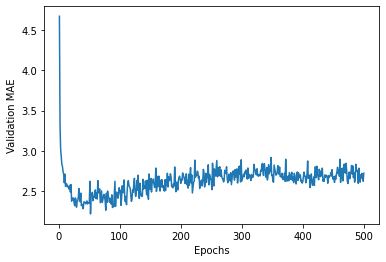

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [21]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [22]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

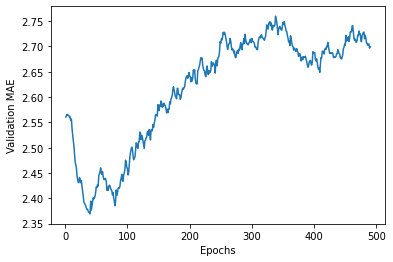

In [23]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [30]:
model = build_model()
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/80
26/26 [==============================] - 1s 1ms/step - loss: 496.5581 - mae: 20.2077
Epoch 2/80
26/26 [==============================] - 0s 1ms/step - loss: 328.9191 - mae: 15.6749
Epoch 3/80
26/26 [==============================] - 0s 2ms/step - loss: 159.6335 - mae: 10.1952
Epoch 4/80
26/26 [==============================] - 0s 1ms/step - loss: 66.2613 - mae: 5.9552
Epoch 5/80
26/26 [==============================] - 0s 1ms/step - loss: 38.1700 - mae: 4.5668
Epoch 6/80
26/26 [==============================] - 0s 2ms/step - loss: 27.8004 - mae: 3.8377
Epoch 7/80
26/26 [==============================] - 0s 1ms/step - loss: 23.2724 - mae: 3.4292
Epoch 8/80
26/26 [==============================] - 0s 1ms/step - loss: 20.6284 - mae: 3.2138
Epoch 9/80
26/26 [==============================] - 0s 1ms/step - loss: 18.5179 - mae: 3.0255
Epoch 10/80
26/26 [==============================] - 0s 1ms/step - loss: 17.1538 - mae: 2.9079
Epoch 11/80
26/26 [==============================] - 

In [31]:
test_mae_score

2.6839184761047363